**SM339 &#x25aa; Applied Statistics &#x25aa; Spring 2023 &#x25aa; Uhan**

# Lesson 22. Cross-validation

## Overview

- Often, we fit a statistical model to _make predictions_

- In this scenario, we can easily check how well the model works:

    - Use the model to make a prediction
    
    - Wait until the response variable can be measured to see how close the prediction comes to the actual value
    
- However... wouldn't it be nice to judge how well the model works _before_ using it on _new_ data?

- __Cross-validation__ is a resampling method that uses different portions of the data to fit a model and then test the model

- One approach:

    - Build and fit the model with one set of data, called the __training sample__
    
    - Use the fitted model to predict responses for a second set of data, called the __testing__ or __holdout sample__
    
    - Compare the accuracy of the fit in the training sample to what is observed for the holdout sample
    
- Generally, we expect the performance of the model to be worse for predicting new data, but _hopefully not too much worse_
    - If it is much worse, we should suspect that the original model just reflects the individual features of the training sample, rather than patterns that hold for the general population

## Example 1

The dataset `HousesNY` from the `Stat2Data` library contains data for a random sample of 53 homes in Canton, New York.

In [1]:
library(Stat2Data)
data(HousesNY)
head(HousesNY)

,Price,Beds,Baths,Size,Lot
,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,57.6,3,2,0.960,1.30
2,120.0,6,2,2.786,0.23
3,150.0,4,2,1.704,0.27
4,143.0,3,2,1.200,0.80
5,92.5,3,1,1.329,0.42
6,50.0,2,1,0.974,0.34


### a.
Since the data comes from a random sample in no particular order, we'll use the first 35 cases as the training sample and reserve the final 18 cases for the holdout sample.

Let's create dataframes for the training and holdout samples:

In [2]:
# Solution
HousesNY.training <- HousesNY[1:35, ]
HousesNY.holdout <- HousesNY[36:53, ]

### b.
Use the training sample to fit a model that predicts $\mathit{Price}$ based on $\mathit{Size}$.

In [3]:
# Solution
fit.training <- lm(Price ~ Size, data = HousesNY.training)
summary(fit.training)


Call:
lm(formula = Price ~ Size, data = HousesNY.training)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.911 -29.397  -2.135  25.980  67.093 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   56.549     16.824   3.361  0.00197 **
Size          33.611      9.354   3.593  0.00105 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34.89 on 33 degrees of freedom
Multiple R-squared:  0.2812,	Adjusted R-squared:  0.2594 
F-statistic: 12.91 on 1 and 33 DF,  p-value: 0.00105


### c.
Create scatterplots for both the training and holdout samples. 
On each scatterplot, draw the least squares line you found in part b.

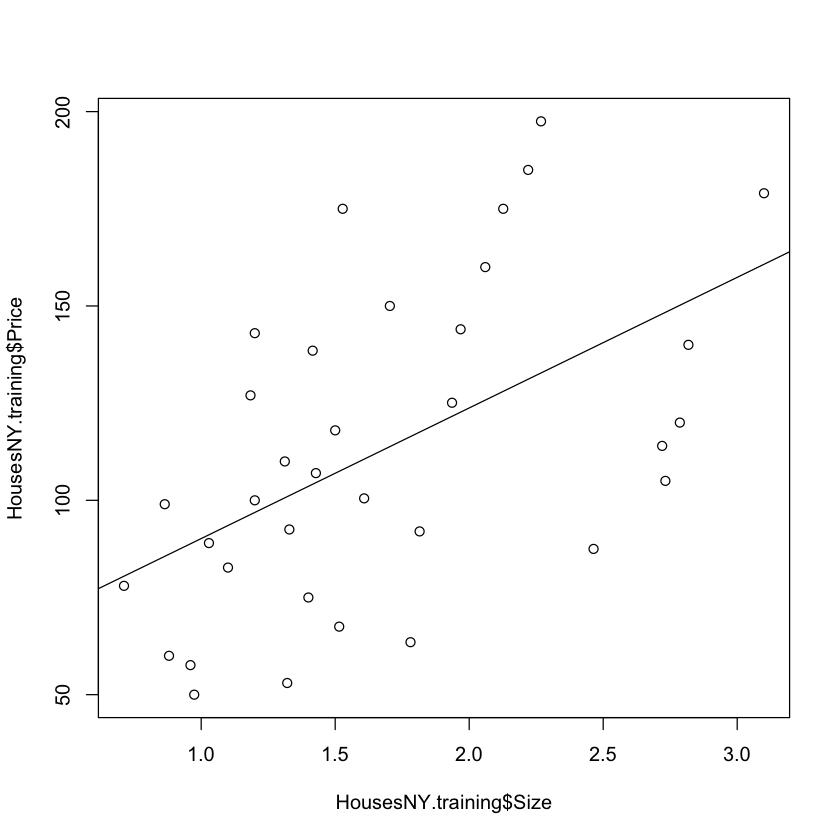

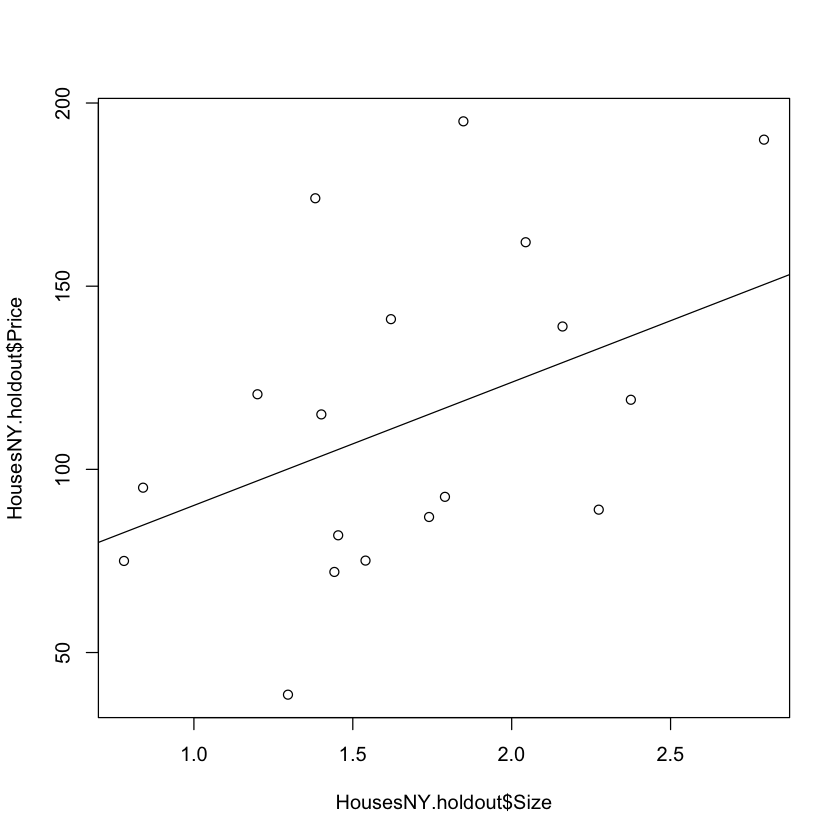

In [4]:
# Solution
plot(HousesNY.training$Size, HousesNY.training$Price)
abline(fit.training)

plot(HousesNY.holdout$Size, HousesNY.holdout$Price)
abline(fit.training)

### d.
Using your fitted model from part b, predict the prices of the houses in the holdout sample.

In [5]:
# Solution
pricehat = predict(fit.training, newdata = HousesNY.holdout)
pricehat

36        37        38        39        40        41        42        43 
 96.88259 105.01646  84.78263 100.10925 129.14917  82.76597 102.99980 136.37554 
       44        45        46        47        48        49        50        51 
132.98082 108.31034 116.71309 110.99922 105.41979 125.25029 118.66253 150.45855 
       52        53 
103.63841 115.03254

### e.
Compute the residuals for the houses in the holdout sample. Compute the mean residual.

In [6]:
# Solution
residuals = HousesNY.holdout$Price - pricehat
mean(residuals)

[1] 2.002944

### f.
Compute the cross-validation correlation between the actual and predicted prices in the holdout sample.

In [7]:
# Solution
cvc <- cor(HousesNY.holdout$Price, pricehat)
cvc

[1] 0.4872931

### g.
Square the cross-validation correlation you found in part f and subtract it from $R^2$  to compute the __shrinkage__.

We use shrinkage as a rough indicator of how well the model is doing at predicting the holdout sample. Shrinkage of 10% or less should not be a problem, but shrinkage of more than 50% would be worrisome.

*Write your notes here. Double-click to edit.*

In [8]:
# Solution
shrinkage <- 0.2812 - cvc^2
shrinkage

[1] 0.04374548

*Solution.* The shrinkage on cross-validation is 0.0437, which is a fairly small amount. We have a good indication that a model fit to predict house prices based on sizes (in Canton, New York) will still predict almost as well when applied to new data.

## Notes

- One drawback of doing cross-validation with a holdout sample: the training model is built with a smaller sample size

- There are many variations on cross-validation, e.g.

    - e.g., We could also take an original sample of 500 cases and randomly divide it into 5 samples of 100 each. Then we let each of the smaller samples take a turn as the holdout sample, using the other 400 values for training.